# **Tugas 1 (Dissimilarity)**

**Tugas mengukur jarak (dissimalirity)**

1. ambil data dari kaggle/github

2. ukur jarak d(1,2) , d(1,3) , d(1,4) objek dari data tersebut

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/endorsements-june-30.csv", encoding = 'unicode_escape', engine ='python')

In [3]:
data

,year,party,candidate,endorsement_points,percentage_endorsement_points,money_raised,percentage_of_money,primary_vote_percentage,won_primary
0,1980,Republican,George H.W. Bush,5,6.32911,1475332.00,16.83,23.81,No
1,1980,Republican,Lowell Weicker,0,0.00000,60000.00,0.68,0.00,No
2,1980,Republican,Phil Crane,0,0.00000,2500000.00,28.53,0.76,No
3,1980,Republican,John Connally,6,7.59494,2200000.00,25.10,0.64,No
4,1980,Republican,Bob Dole,0,0.00000,253286.00,2.89,0.06,No
...,...,...,...,...,...,...,...,...,...
104,2012,Republican,Ron Paul,6,9.09091,4514165.68,14.13,10.89,No
105,2012,Republican,Mitt Romney,42,63.63640,18195222.87,56.95,52.17,Yes
106,2012,Republican,Michele Bachmann,0,0.00000,4288335.65,13.42,0.21,No
107,2012,Republican,Rick Perry,0,0.00000,0.00,0.00,0.28,No


In [4]:
number_of_columns = data.shape[1]

In [5]:
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [6]:
data.columns

Index(['year', 'party', 'candidate', 'endorsement_points',
       'percentage_endorsement_points', 'money_raised', 'percentage_of_money',
       'primary_vote_percentage', 'won_primary'],
      dtype='object')

**Categorical/Nomimal Features**

party

won_primary




In [7]:
data[["candidate","party", "won_primary"]].head(8)

,candidate,party,won_primary
0,George H.W. Bush,Republican,No
1,Lowell Weicker,Republican,No
2,Phil Crane,Republican,No
3,John Connally,Republican,No
4,Bob Dole,Republican,No
5,Ronald Reagan,Republican,Yes
6,Howard Baker,Republican,No
7,John Anderson,Republican,No


**Change Values to 1/0**

**Take all values of 'party' and 'won_primary' series**

If values is Republican and Yes change to 1

If values is Democratic and No change to 0


In [8]:
# party code
code_party_for_republican= "Republican"
code_party_for_democratic = "Democratic"
#won_primary code
code_won_primary_for_yes= "Yes"
code_won_primary_for_no = "No"
# binary value
value_of_one = 1
value_of_zero = 0

def change_code_party_to_biner(party):
    return value_of_one if party == code_party_for_republican else value_of_zero

def change_code_won_primary_to_biner(won_primary):
    return value_of_one if won_primary == code_won_primary_for_yes else value_of_zero

In [9]:
# Update all values of 'Party' series
data["party"] = data["party"].apply(change_code_party_to_biner)

# Update all values of 'won_primary' series
data["won_primary"] = data["won_primary"].apply(change_code_won_primary_to_biner)

In [10]:
data[["candidate","party", "won_primary"]].head(6)

,candidate,party,won_primary
0,George H.W. Bush,1,0
1,Lowell Weicker,1,0
2,Phil Crane,1,0
3,John Connally,1,0
4,Bob Dole,1,0
5,Ronald Reagan,1,1


In [11]:
# CONSTAN VARIABLE
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [12]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [13]:
def get_dissimilarity_dataset(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataset = pd.concat([first_series,second_series],axis=1)
    return dataset.T

In [14]:
get_dissimilarity_dataset(data, [1,2], ["party", "won_primary"]).T

,1,2
party,1,1
won_primary,0,0


In [15]:
data.loc[0:5, ["party", "won_primary"]]

,party,won_primary
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,1


In [16]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [17]:
# d(1,2)
data_1_2 = get_dissimilarity_dataset(data, [1,2], ["party", "won_primary"])

In [18]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [19]:
# d(1,3)
data_1_3 = get_dissimilarity_dataset(data, [1,3], ["party", "won_primary"])

In [20]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [21]:
# d(1,4)
data_1_4 = get_dissimilarity_dataset(data, [1,4], ["party", "won_primary"])

In [22]:
c_d_1_4 = count_contingency_value(data_1_4, 1, 4)

In [23]:
# d(1,5)
data_1_5 = get_dissimilarity_dataset(data, [1,5], ["party", "won_primary"])

In [24]:
c_d_1_5 = count_contingency_value(data_1_5, 1, 5)

**Dissimilarity Binary Assymetric Value Formula**
$$
\frac{r + s}{q + r + s}\
$$


In [25]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [26]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_3)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_4)
d_1_5 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_5)

In [27]:
d_1_2

0.0

In [28]:
d_1_3

0.0

In [29]:
d_1_4

0.0

In [30]:
d_1_5

0.5

# **Tugas 2 (Diskritisasi)**



1.   Carilah data yang bertipe numerik ( data klassifikasi)
2.   Lakukan proses diskritisasi dengan equal width dan equal frequency
3. Lakukan proses diskritisasi dengan basis entropy
4. Kumpulkan tugas dengan link github ( web statis dari jupyter book)


**DATA**

Sumber data: bunga Iris

In [31]:
import pandas as pd

In [32]:
# Create dataframe
data = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")



In [33]:
# show first 15 rows
data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
...,...,...,...,...,...
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [34]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = data["sepal.length"]
SEPAL_WIDTH_SERIES = data["sepal.width"]
PETAL_LENGTH_SERIES = data["petal.length"]
PETAL_WIDTH_SERIES = data["petal.width"]

**Hitung Data**

Definisi discretization

1. Proses mengubah data bertipe data numeric menjadi data bertipe categorical
2. Diskritisasi memiliki 2 pendekatan yaitu equal-width intervals dan equal-frequency intervals
3. equal-width intervals adalah diskritisasi dengan lebar data yang sama
4. equal-frequency intervals adalah diskritisasi dengan jumlah data yang sama

**Cut**


*   Cut adalah sebuah method pada library pandas untuk melakukan perhitungan equal width frequency intervals

```
# Syntax
pd.cut(series, interval, right=True, label)
```

#### Sepal Width

* Equal Width Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [35]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [36]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning), axis=1)

,sepal.width,sepal.width
0,3.5,Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
...,...,...
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Lebar
149,3.0,Lebar


In [37]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

Lebar            88
Sedikit Lebar    47
Sangat Lebar     15
Name: sepal.width, dtype: int64

In [38]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

#### **Petal Width**


*  Equal Width Intervals lebar mahkota bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [39]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [40]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning), axis=1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
...,...,...
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar
149,1.8,Sangat Lebar


In [41]:
# equal-width intervals with label
labelled_petal_width_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.width, dtype: int64

In [42]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

#### **Sepal Length**
* Equal Width Intervals panjang kelopak bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [43]:
# equal-width intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [44]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
...,...,...
146,6.3,Lebar
147,6.5,Lebar
148,6.2,Lebar
149,5.9,Lebar


In [45]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

Lebar            71
Sedikit Lebar    59
Sangat Lebar     20
Name: sepal.length, dtype: int64

In [46]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

#### **Petal Length**
* Equal Width Intervals panjang mahkota bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [47]:
# equal-width intervals
labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [48]:
# dataframe of petal-width and petal category
pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
...,...,...
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar
149,5.1,Sangat Lebar


In [49]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [50]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

#### **Qcut**
* Qcut adalah sebuah method pada library pandas untuk melakukan perhitungan equal frequency intervals

```
# Syntax
pd.qcut(series, interval, label)
```

#### **Sepal Width**
* Equal Frequency Intervals lebar kelopak bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [51]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [52]:
# dataframe of sepal-width and sepal category
pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning), axis = 1)

,sepal.width,sepal.width
0,3.5,Sangat Lebar
1,3.0,Lebar
2,3.2,Lebar
3,3.1,Lebar
...,...,...
146,2.5,Sedikit Lebar
147,3.0,Lebar
148,3.4,Sangat Lebar
149,3.0,Lebar


In [53]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

Sedikit Lebar    57
Lebar            50
Sangat Lebar     43
Name: sepal.width, dtype: int64

In [54]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

#### **Petal Width**
* Equal Frequency Intervals lebar mahkota bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [55]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [56]:
# dataframe of petal-width and petal category
pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning), axis = 1)

,petal.width,petal.width
0,0.2,Sedikit Lebar
1,0.2,Sedikit Lebar
2,0.2,Sedikit Lebar
3,0.2,Sedikit Lebar
...,...,...
146,1.9,Sangat Lebar
147,2.0,Sangat Lebar
148,2.3,Sangat Lebar
149,1.8,Sangat Lebar


In [57]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

Lebar            52
Sedikit Lebar    50
Sangat Lebar     48
Name: petal.width, dtype: int64

In [58]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

#### **Sepal Length**
* Equal Frequency Intervals panjang kelopak bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [59]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [60]:
# dataframe of sepal-length and sepal category
pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning), axis=1)

,sepal.length,sepal.length
0,5.1,Sedikit Lebar
1,4.9,Sedikit Lebar
2,4.7,Sedikit Lebar
3,4.6,Sedikit Lebar
...,...,...
146,6.3,Lebar
147,6.5,Sangat Lebar
148,6.2,Lebar
149,5.9,Lebar


In [61]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

Lebar            56
Sedikit Lebar    52
Sangat Lebar     42
Name: sepal.length, dtype: int64

In [62]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

#### **Petal Length**
* Equal Frequency Intervals panjang mahkota bunga Iris

* Dikelompokkan menjadi 3 kategori yaitu

* Kategori sedikit lebar

* Kategori lebar

* Kategori sangat lebar

In [63]:
# equal-frequency intervals

labels = ["Sedikit Lebar", "Lebar", "Sangat Lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [64]:
# dataframe of petal-length and petal category
pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning), axis=1)

,petal.length,petal.length
0,1.4,Sedikit Lebar
1,1.4,Sedikit Lebar
2,1.3,Sedikit Lebar
3,1.5,Sedikit Lebar
...,...,...
146,5.0,Sangat Lebar
147,5.2,Sangat Lebar
148,5.4,Sangat Lebar
149,5.1,Sangat Lebar


In [65]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

Lebar            54
Sedikit Lebar    50
Sangat Lebar     46
Name: petal.length, dtype: int64

In [66]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

# **Tugas 3(K-Nearest Neighbors/KNN)**
## Pengertian KNN
Algoritma K-Nearest Neighbors (KNN) adalah sebuah metode klasifikasi terhadap sekumpulan data berdasarkan pembelajaran data yang sudah terklasifikasikan sebelumya.
## Tahapan KNN
Tahapan dalam melakukan klasifikasi menggunakan algoritma KNN :

1.   Menentukan parameter k (jumlah tetangga paling dekat),
2.   Menghitung kuadrat jarak euclidean objek terhadap data training yang diberikan,
3. Mengurutkan hasil pada tahapan ke-2 secara ascending (berurutan dari nilai tinggi ke rendah),
4. Mengumpulkan kategori Y (klasifikasi nearest neighbors berdasarkan nilai k),
5. Dengan menggunakan kategori nearest neighbors yang paling mayoritas maka dapat dipredisikan kategori objek.

## Implemetasi K-NN Pada datase Iris

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [68]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data = pd.read_csv(url)


In [69]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Memisahkan Features dan Label

In [70]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Membagi data latih dan uji

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=10)

Label endcoding

In [72]:
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

Standarisasi

Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.




In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Menentukan nilai konstanta K

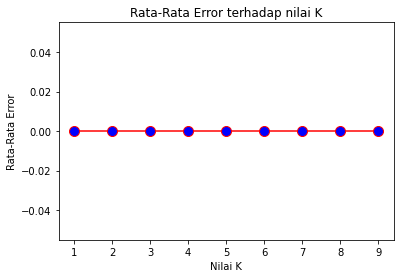

In [74]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 10), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Training

Menggunakan  nilai Konstanta K=4

In [75]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Evaluation

Mengecek akurasi model yang dibuat

In [76]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=lb.classes_))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Tugas 4(Naive Bayes Classifier)**
## Pengertian Naive Bayes Classifie
Pengklasifikasi Naive Bayes adalah model pembelajaran mesin probabilistik yang digunakan untuk tugas klasifikasi. Inti dari classifier didasarkan pada teorema Bayes.
## Rumus teorema bayes
$$ P(H|X) = \frac{P(X|H)P(H)} {P(X)}$$

Dimana :
*   **X** : Data kelas yang belum diketahui
*   **H** : Hipotesa dari X yang merupakan data kelas spesifik 
*   **P(H|X)** : Probabilitas hipotesa H berdasarkan kondisi X
*   **P(H)**   : Probabilitas hipotesa H
*   **P(X|H)** : Probabilitas X berdasarkan kondisi hipotesa H
*   **P(X)** : Probabilitas dari X







In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
iris=pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/Iris%20(1).csv")

In [79]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [80]:
iris.drop(columns="Id",inplace=True)

In [81]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [83]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [84]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


# **Tugas 5 (K-Means Clustering)**
## Pengertian K-Means
K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. 

K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain. 

Cluster Sampling adalah teknik pengambilan sampel di mana unit-unit populasi dipilih secara acak dari kelompok yang sudah ada yang disebut ‘cluster, nah Clustering atau klasterisasi adalah salah satu masalah yang menggunakan teknik unsupervised learning.
## Karakteristik dari K-Means Cluster:

1. Cepat dalam proses clustering
2. Sensitif terhadap nilai centroid
3. Hasil dari Kmeans selalu berubah ubah(dikarenakan tidak unik)
4. Sulit meraih global optimum



## Kekurangan dari K-Means clustering

1. cluster model berbeda ditemukan
2. sulit untuk memilih jumlah cluster yang tepat
3. Overlapping
4. Kegagalan dalam konverge



In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/DwiAqilahP/datamining/main/Iris%20(1).csv'
columns = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [87]:
data.drop(columns='Id',inplace=True)

In [88]:
x = data.values[:, 0:4]

In [89]:
y = data.values[:,4]

In [90]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [91]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [92]:
dfkelas = pd.DataFrame(label, columns=['class'])

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [94]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [95]:
from sklearn.cluster import KMeans
#number of cluster
kmeans = KMeans = KMeans(n_clusters=3)
#fitting the input data
kmeans= kmeans.fit(x_new)
#getting the clusters  labels
prediksi = kmeans.predict(x_new)
#centroids values
centroids = kmeans.cluster_centers_

In [96]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [97]:
x_new[:,1:12].shape

(150, 1)

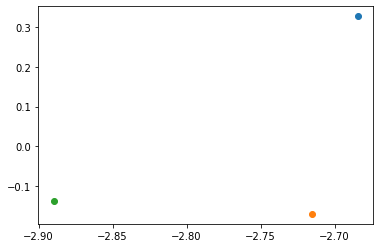

In [98]:
from numpy import unique
from matplotlib import pyplot
from numpy import where 
yhat = unique(prediksi)
clusters = unique(yhat)
#create scatter plot for samples from each cluster
for cluster in clusters:
  #get row indexes for samples with this cluster
  row_ix = where (yhat == cluster)
  #create scatter of these samples
  pyplot.scatter(x_new[row_ix,0],x_new[row_ix,1])
#show the plot
pyplot.show()

In [99]:
a=prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [100]:
prediksi = np.array(a)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(label,prediksi)

0.44666666666666666

In [103]:
type(x_new[row_ix, 0])

numpy.ndarray

In [104]:
x_new[row_ix,0]

array([[-2.88981954]])

In [105]:
x[row_ix,1]

array([[3.2]], dtype=object)

In [106]:
yhat

array([0, 1, 2], dtype=int32)

# **Tugas 6(Decision tree)**

### Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab.
Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

### Jenis Keputusan
Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

1. Pohon keputusan variabel kategori
Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

2. Pohon keputusan variabel kontinu
Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.

### Rumus Gini Index
$$ Gini Index = 1-Σ_i^n (P_i)^2$$

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/DwiAqilahP/datamining/main/Iris%20(1).csv'
data = pd.read_csv(url)

In [108]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [109]:
y = data["Species"]
X = data.drop(columns=["Species"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

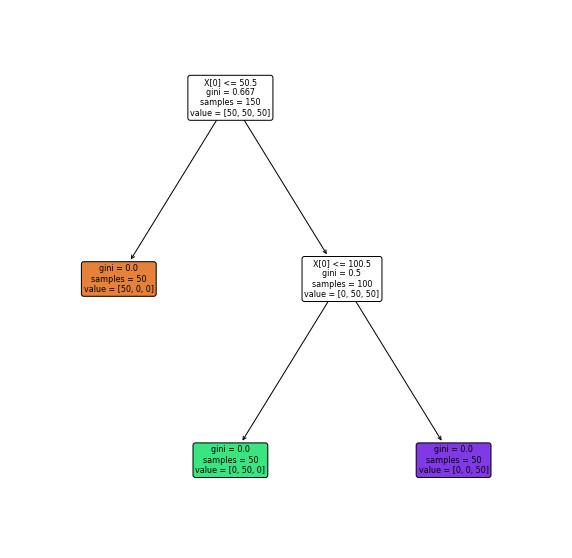

In [110]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

# **Tugas 7(Implementasi Keputusan Bisnis)**
**Kasus Dengan Kredit Score**

### Studi Kasus Dengan Kredit Score

### Preprocessing data

In [111]:
import pandas as pd
import numpy as np

In [112]:
df = pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/credit_score%20(1).csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [113]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [114]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [115]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
...,...,...
896,0,1
897,1,0
898,1,0
899,1,0


In [116]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,...,0,0,1,0
1,AGR-000011,271,36,5,...,0,0,1,0
2,AGR-000030,159,12,0,...,0,0,0,0
3,AGR-000043,210,12,3,...,0,1,0,0
4,AGR-000049,165,36,0,...,1,0,0,0


In [117]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [118]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [119]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,...,0,1,0,4
1,AGR-000011,271,36,5,...,0,1,0,4
2,AGR-000030,159,12,0,...,0,0,0,1
3,AGR-000043,210,12,3,...,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,120,48,2,...,1,0,0,3
897,AGR-010758,166,24,2,...,0,0,0,1
898,AGR-010775,196,48,0,...,0,0,0,2
899,AGR-010790,204,24,2,...,0,0,0,1


In [120]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [121]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
...,...,...,...
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [122]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2
899,AGR-010790,1,0,1,0,0,0,0,1


In [123]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,...,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,3,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,2,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,1,0.582609,0.333333,0.333333


In [124]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,...,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,0,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,0,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,0,0.582609,0.333333,0.333333


In [125]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,...,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,...,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,...,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,...,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,...,0.608696,0.000000,0.500000,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,...,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,...,0.547826,1.000000,0.000000,2
899,AGR-010790,1,0,1,...,0.582609,0.333333,0.333333,1


### Naive bayes classifier

In [126]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [127]:
X=df_new4.iloc[:,1:10].values
y=df_new4.iloc[:,11].values

In [128]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [129]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


#### create model for Naive Bayes

In [130]:
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# model = GaussianNB()
# model.fit(X_train, y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

# print(result)

### K-NN Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print(acc_knn)

100.0


# Tugas 8 (Normalization vs Unnomarlization)

1.   Baca data *Diabetic Retinopathy Debrecen Data Set*
2.   Buat data tes & data latih.
3.   Digunakan untuk model JST dan lainnya
4.   Implementasikan algoritma berikut untuk menentukan kelas dari sebuah data


> Gaussian Naive Bayes


> K - Nearest Neighbors


> Decision Tree


4.   Tampilkan *accuracy, precision, & recall* dari setiap algoritma

## Baca Data 



*   Baca data dengan *library pandas* *italicized text*
*   Data [Credit Score](https://raw.githubusercontent.com/MuhammadKurniaSani-me/credit_score/main/credit_score.csv)

*   Data [Hitung Manual](https://docs.google.com/spreadsheets/d/1Yz2evrqDKDqPaltk3VhEDbd8QkbkXZjE/edit?usp=sharing&ouid=104778244268493691619&rtpof=true&sd=true)

### Persiapan Lingkungan


*   Impor *pandas library*
*   Impor *numpy library*
*   Impor *train_test_split* dari *sklearn*
*   Impor *gaussian naive bayes* dari *sklearn*
*   Impor *library* tambahan yang dibutuhkan dari *sklearn*

In [132]:
### Data Wrangling 
import pandas as pd
import numpy as np
from scipy.io import arff
from collections import OrderedDict

### Modelling 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [133]:
# load data set
# dataset_url = "https://raw.githubusercontent.com/MuhammadKurniaSani-me/credit_score/main/credit_score.csv"
data = arff.loadarff("/content/drive/MyDrive/datamining/tugas/messidor_features.arff")

In [134]:
df = pd.DataFrame(data[0])

In [135]:
#check number of rows and columns in dataset
df.shape

(1151, 20)

In [136]:
df

,0,1,2,3,...,16,17,18,Class
0,1.0,1.0,22.0,22.0,...,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,...,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,...,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,...,0.483284,0.114790,0.0,b'0'
...,...,...,...,...,...,...,...,...,...
1147,1.0,1.0,49.0,49.0,...,0.516733,0.124190,0.0,b'0'
1148,1.0,0.0,49.0,48.0,...,0.560632,0.129843,0.0,b'0'
1149,1.0,1.0,39.0,36.0,...,0.485972,0.106690,1.0,b'1'
1150,1.0,1.0,7.0,7.0,...,0.556192,0.088957,0.0,b'0'


In [137]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append("quality")
    if i == 1:
        col_names.append("prescreen")
    if i >= 2 and i <= 7:
        col_names.append("ma" + str(i))
    if i >= 8 and i <= 15:
        col_names.append("exudate" + str(i))
    if i == 16:
        col_names.append("euDist")
    if i == 17:
        col_names.append("diameter")
    if i == 18:
        col_names.append("amfm_class")
    if i == 19:
        col_names.append("label")

In [138]:
df.columns = col_names

In [139]:
X = df.drop(columns = ["label"])

In [140]:
y = df["label"].values

In [141]:
y

array([b'0', b'0', b'1', ..., b'0', b'1', b'0'], dtype=object)

In [142]:
scaler = MinMaxScaler()
scala = scaler.fit(X)

In [143]:
data_normal = scaler.transform(X)

In [144]:
le = preprocessing.LabelEncoder()
le.fit(y)
le.transform(y)

array([0, 0, 1, ..., 0, 1, 0])

In [145]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y_1, test_size = percent_amount_of_test_data, random_state=0)

clf2 = GaussianNB()
clf2.fit(training, test)

NameError: ignored

In [230]:
post = clf2.predict_proba(test)
probas = post[:,1]
probas = np.round(probas)

NameError: ignored

In [231]:
pred = probas
akurasi = accuracy_score(test_label, pred)

NameError: ignored

In [232]:
# create a dataframe with all training data except the target column
X = df.drop(columns=["risk_rating"])

# check that the target variable has been removed
X.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue
0,1,AGR-000001,295,YA,48,5,61 - 90 days
1,2,AGR-000011,271,YA,36,5,61 - 90 days
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days
3,4,AGR-000043,210,YA,12,3,46 - 60 days
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days


*    Transform feature *rata_rata_overdue* to numerical data type 
*    Split the numerical columns based on "range days"


```
# Range Days
['>90', '0-30', '31-45', '46-60', '61-90']
```

In [233]:
split_overdue_X = pd.get_dummies(X["rata_rata_overdue"], prefix="overdue")
X = X.join(split_overdue_X)

X = X.drop(columns = "rata_rata_overdue")


*    Then normalize "kpr_aktif" feature
*    Split the numerical columns based on "yes" or "no"


```
# KPR values
['yes', 'no']
```

In [234]:
# 
KPR_status = pd.get_dummies(X["kpr_aktif"], prefix="KPR")
X = X.join(KPR_status)

# remove "rata_rata_overdue" feature
X = X.drop(columns = "kpr_aktif")

In [235]:
X

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,...,overdue_61 - 90 days,overdue_> 90 days,KPR_TIDAK,KPR_YA
0,1,AGR-000001,295,48,...,1,0,0,1
1,2,AGR-000011,271,36,...,1,0,0,1
2,3,AGR-000030,159,12,...,0,0,1,0
3,4,AGR-000043,210,12,...,0,0,0,1
...,...,...,...,...,...,...,...,...,...
896,897,AGR-010744,120,48,...,0,0,0,1
897,898,AGR-010758,166,24,...,0,0,1,0
898,899,AGR-010775,196,48,...,0,0,1,0
899,900,AGR-010790,204,24,...,0,0,1,0


*    Normalize feature
*    Scale these fatures with range value between 0 to 1

```
# features will be normalize
['pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
```



In [236]:
# normalize feature 'pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan'
old_normalize_feature_labels = ['pendapatan_setahun_juta', 'durasi_pinjaman_bulan', 'jumlah_tanggungan']
new_normalized_feature_labels = ['norm_pendapatan_setahun_juta', 'norm_durasi_pinjaman_bulan', 'norm_jumlah_tanggungan']
normalize_feature = df[old_normalize_feature_labels]

In [237]:
normalize_feature

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,295,48,5
1,271,36,5
2,159,12,0
3,210,12,3
...,...,...,...
896,120,48,2
897,166,24,2
898,196,48,0
899,204,24,2


In [238]:
scaler = MinMaxScaler()

In [239]:
scaler.fit(normalize_feature)

MinMaxScaler()

In [240]:
normalized_feature = scaler.transform(normalize_feature)

In [241]:
normalized_feature_df = pd.DataFrame(normalized_feature, columns = new_normalized_feature_labels)

In [242]:
normalized_feature_df

,norm_pendapatan_setahun_juta,norm_durasi_pinjaman_bulan,norm_jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
...,...,...,...
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [243]:
X = X.drop(columns = old_normalize_feature_labels)

In [244]:
X = X.join(normalized_feature_df)

In [245]:
X = X.join(labels)

AttributeError: ignored

In [246]:
X

,Unnamed: 0,kode_kontrak,overdue_0 - 30 days,overdue_31 - 45 days,...,KPR_YA,norm_pendapatan_setahun_juta,norm_durasi_pinjaman_bulan,norm_jumlah_tanggungan
0,1,AGR-000001,0,0,...,1,0.978261,1.000000,0.833333
1,2,AGR-000011,0,0,...,1,0.873913,0.666667,0.833333
2,3,AGR-000030,1,0,...,0,0.386957,0.000000,0.000000
3,4,AGR-000043,0,0,...,1,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,897,AGR-010744,0,0,...,1,0.217391,1.000000,0.333333
897,898,AGR-010758,1,0,...,0,0.417391,0.333333,0.333333
898,899,AGR-010775,0,1,...,0,0.547826,1.000000,0.000000
899,900,AGR-010790,1,0,...,0,0.582609,0.333333,0.333333


In [247]:
subject_lables = ["Unnamed: 0",  "kode_kontrak"]
X = X.drop(columns = subject_lables)

In [248]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = percent_amount_of_test_data, random_state=0)

NameError: ignored

In [249]:
X.shape

(900, 10)

In [250]:
X

,overdue_0 - 30 days,overdue_31 - 45 days,overdue_46 - 60 days,overdue_61 - 90 days,...,KPR_YA,norm_pendapatan_setahun_juta,norm_durasi_pinjaman_bulan,norm_jumlah_tanggungan
0,0,0,0,1,...,1,0.978261,1.000000,0.833333
1,0,0,0,1,...,1,0.873913,0.666667,0.833333
2,1,0,0,0,...,0,0.386957,0.000000,0.000000
3,0,0,1,0,...,1,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,0,0,1,0,...,1,0.217391,1.000000,0.333333
897,1,0,0,0,...,0,0.417391,0.333333,0.333333
898,0,1,0,0,...,0,0.547826,1.000000,0.000000
899,1,0,0,0,...,0,0.582609,0.333333,0.333333


### Hitung Data

*   Pisahkan kolom "risk_rating" dari *dataframe*
*   Ambil kolom "risk_rating" sebagai target kolom untuk kategori kelas
*   Pisahkan data latih dengan data tes


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```

In [251]:
# separate target 

# values
matrices_X = X.iloc[:,0:10].values

# classes
matrices_Y = X.iloc[:,10].values

IndexError: ignored

In [252]:
X_1 = X.iloc[:,0:10].values
Y_1 = X.iloc[:, -1].values

In [253]:
# X_train, X_test, y_train, y_test = train_test_split(matrices_X, matrices_Y, test_size = percent_amount_of_test_data, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = percent_amount_of_test_data, random_state=0)

In [254]:
X_1

array([[0.        , 0.        , 0.        , ..., 0.97826087, 1.        ,
        0.83333333],
       [0.        , 0.        , 0.        , ..., 0.87391304, 0.66666667,
        0.83333333],
       [1.        , 0.        , 0.        , ..., 0.38695652, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.4173913 , 0.33333333,
        0.33333333],
       [0.        , 1.        , 0.        , ..., 0.54782609, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.5826087 , 0.33333333,
        0.33333333]])

In [255]:
Y_1

array([0.83333333, 0.83333333, 0.        , 0.5       , 0.        ,
       0.83333333, 0.5       , 0.5       , 0.83333333, 1.        ,
       0.        , 0.        , 0.83333333, 0.66666667, 0.66666667,
       0.5       , 0.5       , 0.        , 0.        , 0.        ,
       0.83333333, 0.5       , 0.66666667, 1.        , 0.        ,
       0.        , 0.        , 0.83333333, 1.        , 0.        ,
       1.        , 0.        , 0.16666667, 0.16666667, 0.66666667,
       1.        , 0.83333333, 0.        , 0.83333333, 0.5       ,
       1.        , 0.16666667, 0.5       , 0.83333333, 0.        ,
       1.        , 0.        , 0.83333333, 0.33333333, 0.        ,
       0.66666667, 0.16666667, 0.66666667, 0.16666667, 0.33333333,
       0.        , 0.83333333, 0.        , 0.5       , 0.5       ,
       0.33333333, 0.66666667, 0.83333333, 0.33333333, 0.83333333,
       0.5       , 0.        , 0.83333333, 0.        , 0.        ,
       0.5       , 1.        , 0.        , 0.        , 0.5    

In [256]:
### Dictionary to store model and its accuracy

model_accuracy = OrderedDict()

### Dictionary to store model and its precision

model_precision = OrderedDict()

### Dictionary to store model and its recall

model_recall = OrderedDict()

An example data to test from customer "Dio"


---


*    overdue 0 - 30  days : 0
*    overdue 31 - 45 days : 0
*    overdue 46 - 60 days : 0 
*    overdue 61 - 90 days : 0
*    overdue > 90 days    : 0 
*    KPR_TIDAK : 0
*    KPR_YA	: 1
*    norm_pendapatan_setahun_juta : 0.582609 
*    norm_durasi_pinjaman_bulan	: 0.666667  
*    norm_jumlah_tanggungan	: 0

Determine the risk_rating

```
# Data example 'Dio' customer
[0,	0,	0,	0,	0,	0,	1,	0.582609,	0.666667,	0]
```



#### Implementasi Gaussian Naive Bayes

In [257]:
### Applying Naive Bayes Classification model

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
Y_pred_nb = naive_bayes_classifier.predict(X_test)


### Making the confusion matrix
cm = confusion_matrix(y_test, Y_pred_nb)


### Printing the accuracy, precision, and recall of the model
print('Confusion matrix for Gaussian Naive Bayes\n',cm)

naive_bayes_accuracy = round(100 * accuracy_score(y_test, Y_pred_nb), 2)
model_accuracy['Gaussian Naive Bayes'] = naive_bayes_accuracy

naive_bayes_precision = round(100 * precision_score(y_test, Y_pred_nb, average = 'weighted'), 2)
model_precision['Gaussian Naive Bayes'] = naive_bayes_precision

naive_bayes_recall = round(100 * recall_score(y_test, Y_pred_nb, average = 'weighted'), 2)
model_recall['Gaussian Naive Bayes'] = naive_bayes_recall

print('The accuracy of this model is {} %.'.format(naive_bayes_accuracy))
print('The precision of this model is {} %.'.format(naive_bayes_precision))
print('The recall of this model is {} %.'.format(naive_bayes_recall))


ValueError: ignored

In [258]:
clf = GaussianNB()
clf.fit(matrices_X, matrices_Y)
clf_pf = GaussianNB()
clf_pf.partial_fit(matrices_X, matrices_Y, np.unique(matrices_Y))

NameError: ignored

In [259]:
FIRST_IDX = 0

In [260]:
# try with value [0,	0,	0,	0,	0,	0,	1,	0.582609,	0.666667,	0]
result_test_naive_bayes = clf_pf.predict([[0,	0,	0,	0,	0,	0,	1,	0.582609,	0.666667,	0]])[FIRST_IDX]
print(f"Customer Name : Dio has risk rating {result_test_naive_bayes} based on Gaussian Naive Bayes model")

NameError: ignored

#### Implementasi K - Nearest Neighbors



*   Tentukan nilai K = 10 (10 tetangga terdekat)
*   Buat data latih

In [261]:
amount_of_neighbor = 10

In [262]:
# Fit the classifier to the data
knn = KNeighborsClassifier(n_neighbors = amount_of_neighbor)

# create train data
knn.fit(X_train,y_train)

ValueError: ignored

In [263]:
#show first 5 model predictions on the test data
Y_pred_knn = knn.predict(X_test)

AttributeError: ignored

In [264]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

AttributeError: ignored

In [265]:
# Custom value to predict
result_test_knn = knn.predict([[0,	0,	0,	0,	0,	0,	1,	0.582609,	0.666667,	0]])
print(f"Customer Name : Dio has risk rating {result_test_knn[FIRST_IDX]} based on KNN model")

AttributeError: ignored

In [266]:
### Making the confusion matrix
cm = confusion_matrix(y_test, Y_pred_knn)

### Printing the accuracy, precision, and recall of the model
print('Confusion matrix for K - Nearest Neighbors\n',cm)
nn1_accuracy = round(100 * accuracy_score(y_test, Y_pred_knn), 2)
model_accuracy['1 - Nearest Neighbors'] = nn1_accuracy

nn1_precision = round(100 * precision_score(y_test, Y_pred_knn, average = 'weighted'), 2)
model_precision['1 - Nearest Neighbors'] = nn1_precision

nn1_recall = round(100 * recall_score(y_test, Y_pred_knn, average = 'weighted'), 2)
model_recall['1 - Nearest Neighbors'] = nn1_recall

print('The accuracy of this model is {} %.'.format(nn1_accuracy))
print('The precision of this model is {} %.'.format(nn1_precision))
print('The recall of this model is {} %.'.format(nn1_recall))

NameError: ignored

#### Implementasi Decision Tree

In [267]:
### Applying Decision Tree Classification model

decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 27)
decision_tree_classifier.fit(X_train, y_train)


### Predicting the Test set results

Y_pred_dc = decision_tree_classifier.predict(X_test)

ValueError: ignored

In [268]:
### Making the confusion matrix
cm = confusion_matrix(y_test, Y_pred_dc)

### Printing the accuracy, precision, and recall of the model
print('Confusion matrix for Decision Tree\n',cm)

decision_tree_accuracy = round(100 * accuracy_score(y_test, Y_pred_dc), 2)
model_accuracy['Decision Tree'] = decision_tree_accuracy

decision_tree_precision = round(100 * precision_score(y_test, Y_pred_dc, average = 'weighted'), 2)
model_precision['Decision Tree'] = decision_tree_precision

decision_tree_recall = round(100 * recall_score(y_test, Y_pred_dc, average = 'weighted'), 2)
model_recall['Decision Tree'] = decision_tree_recall

print('The accuracy of this model is {} %.'.format(decision_tree_accuracy))
print('The precision of this model is {} %.'.format(decision_tree_precision))
print('The recall of this model is {} %.'.format(decision_tree_recall))

NameError: ignored

# Tugas 9 (Random Forest)

> Pemblokiran indentasi



### Preprocessing data

In [146]:
import pandas as pd
import numpy as np

In [147]:
df = pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/credit_score%20(1).csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [148]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [149]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [150]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
...,...,...
896,0,1
897,1,0
898,1,0
899,1,0


In [151]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,...,0,0,1,0
1,AGR-000011,271,36,5,...,0,0,1,0
2,AGR-000030,159,12,0,...,0,0,0,0
3,AGR-000043,210,12,3,...,0,1,0,0
4,AGR-000049,165,36,0,...,1,0,0,0


In [152]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [153]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [154]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,...,0,1,0,4
1,AGR-000011,271,36,5,...,0,1,0,4
2,AGR-000030,159,12,0,...,0,0,0,1
3,AGR-000043,210,12,3,...,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,120,48,2,...,1,0,0,3
897,AGR-010758,166,24,2,...,0,0,0,1
898,AGR-010775,196,48,0,...,0,0,0,2
899,AGR-010790,204,24,2,...,0,0,0,1


In [155]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [156]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
...,...,...,...
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [157]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2
899,AGR-010790,1,0,1,0,0,0,0,1


In [158]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,...,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,3,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,2,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,1,0.582609,0.333333,0.333333


In [159]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,...,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,0,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,0,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,0,0.582609,0.333333,0.333333


In [160]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,...,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,...,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,...,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,...,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,...,0.608696,0.000000,0.500000,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,...,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,...,0.547826,1.000000,0.000000,2
899,AGR-010790,1,0,1,...,0.582609,0.333333,0.333333,1


### Naive bayes classifier

In [161]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [162]:
X=df_new4.iloc[:,1:11].values
y=df_new4.iloc[:,11].values

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [164]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


#### create model for Naive Bayes

In [165]:
import pandas
from sklearn import model_selection
import pickle
model = GaussianNB()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# apply the whole pipeline to data
dataArray = [0, 1, 1, 0, 1, 0, 0, 0.582609, 0.333333, 0.333333]
pred = loaded_model.predict([dataArray])
print(pred)

[3]


## Ensemble Stacking (Tugas 10)

### Preprocessing data

In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/credit_score%20(1).csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [168]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [169]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [170]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
...,...,...
896,0,1
897,1,0
898,1,0
899,1,0


In [171]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,...,0,0,1,0
1,AGR-000011,271,36,5,...,0,0,1,0
2,AGR-000030,159,12,0,...,0,0,0,0
3,AGR-000043,210,12,3,...,0,1,0,0
4,AGR-000049,165,36,0,...,1,0,0,0


In [172]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [173]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [174]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,...,0,1,0,4
1,AGR-000011,271,36,5,...,0,1,0,4
2,AGR-000030,159,12,0,...,0,0,0,1
3,AGR-000043,210,12,3,...,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,120,48,2,...,1,0,0,3
897,AGR-010758,166,24,2,...,0,0,0,1
898,AGR-010775,196,48,0,...,0,0,0,2
899,AGR-010790,204,24,2,...,0,0,0,1


In [175]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [176]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
...,...,...,...
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [177]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2
899,AGR-010790,1,0,1,0,0,0,0,1


In [178]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,...,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,3,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,2,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,1,0.582609,0.333333,0.333333


In [179]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,...,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,0,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,0,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,0,0.582609,0.333333,0.333333


In [180]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,...,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,...,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,...,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,...,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,...,0.608696,0.000000,0.500000,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,...,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,...,0.547826,1.000000,0.000000,2
899,AGR-010790,1,0,1,...,0.582609,0.333333,0.333333,1


In [181]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np

In [182]:
df = pd.read_csv("https://raw.githubusercontent.com/DwiAqilahP/datamining/main/credit_score%20(1).csv")
df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [184]:
# Create a Randomforest classifier
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

# Create a XGBoost classifier
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

# Create a Logistic regression classifier

knnclassifier = KNeighborsClassifier(n_neighbors=10)

# Create a stacking classifier

estimators = [
     ('rf', forest),
     ('xgb', boost)
]
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=knnclassifier,
                            cv=10)

# Fit the random forest classifier; Print the scores

forest.fit(X_train, y_train)
print(f"Random forest model training Accuracy: {forest.score(X_train, y_train):0.2f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.2f}")

# Fit the XGBoost classifier; Print the scores

boost.fit(X_train, y_train)
print(f"\nXGBoost model training Accuracy: {boost.score(X_train, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {boost.score(X_test, y_test):0.2f}")

# Fit the Stacking classifier; Print the scores

sclf.fit(X_train, y_train)
print(f"\nStacking classifier training Accuracy: {sclf.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {sclf.score(X_test, y_test):0.2f}")

Random forest model training Accuracy: 1.00
Random forest model test Accuracy: 1.00

XGBoost model training Accuracy: 1.00
XGBoost model test Accuracy: 1.00

Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 1.00


# **UTS**

##**No.1 Metode KNN**

In [185]:
import pandas as pd
#read in the data using pandas
url = 'https://raw.githubusercontent.com/DwiAqilahP/datamining/main/dataR2.csv'
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,Age,BMI,Glucose,Insulin,...,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,...,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,...,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,...,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,...,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,...,4.819240,10.57635,773.920,1


In [186]:
#check number of rows and columns in dataset
df.shape

(116, 10)

In [187]:
#create a dataframe with all training data except the target column
X = df.drop(columns=['Classification'])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [188]:
#separate target values
y = df['Classification'].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [189]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [190]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [191]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [192]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

In [193]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [194]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [195]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [196]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

Text(0, 0.5, 'Mean Error')

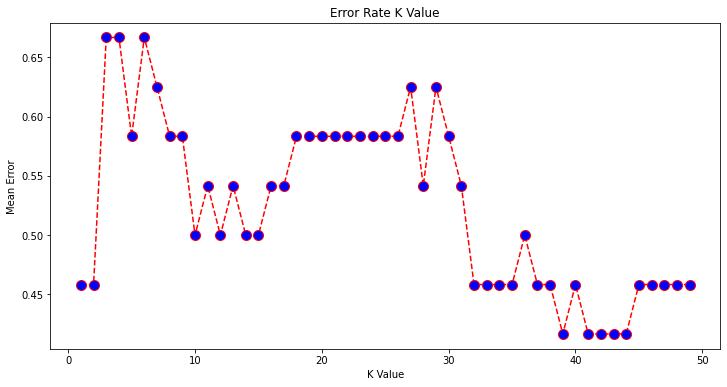

In [197]:
# Calculating error for K values between 2 and 10
error = []
import matplotlib.pyplot as plt
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

##**No.2 metode pohon keputusan (Desision tree)**

In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/DwiAqilahP/datamining/main/dataR2.csv'
data = pd.read_csv(url)

In [199]:
data

,Age,BMI,Glucose,Insulin,...,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,...,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,...,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,...,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,...,7.169560,12.76600,928.220,1
...,...,...,...,...,...,...,...,...,...
112,62,26.840000,100,4.530,...,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,...,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,...,33.750000,3.27000,392.460,2
115,86,27.180000,138,19.910,...,14.110000,4.35000,90.090,2


In [200]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

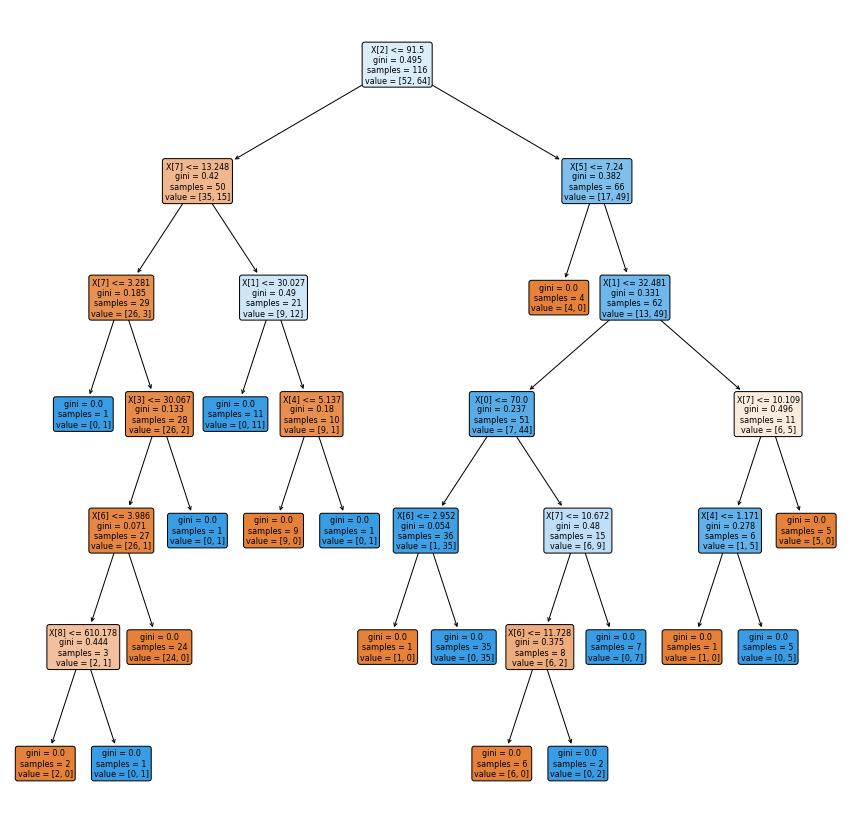

In [201]:
#plt the figure, setting a black background
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

# Studi Kasus Dengan Kredit Score

## Preprocessing data

In [202]:
import pandas as pd
import numpy as np

In [203]:
df = pd.read_csv("https://raw.githubusercontent.com/FajarFatha/datamining/main/credit_score4.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [204]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [205]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [206]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
...,...,...
896,0,1
897,1,0
898,1,0
899,1,0


In [207]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,...,0,0,1,0
1,AGR-000011,271,36,5,...,0,0,1,0
2,AGR-000030,159,12,0,...,0,0,0,0
3,AGR-000043,210,12,3,...,0,1,0,0
4,AGR-000049,165,36,0,...,1,0,0,0


In [208]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [209]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [210]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,...,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,...,0,1,0,4
1,AGR-000011,271,36,5,...,0,1,0,4
2,AGR-000030,159,12,0,...,0,0,0,1
3,AGR-000043,210,12,3,...,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,120,48,2,...,1,0,0,3
897,AGR-010758,166,24,2,...,0,0,0,1
898,AGR-010775,196,48,0,...,0,0,0,2
899,AGR-010790,204,24,2,...,0,0,0,1


In [211]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [212]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
...,...,...,...
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [213]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2
899,AGR-010790,1,0,1,0,0,0,0,1


In [214]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,...,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,3,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,2,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,1,0.582609,0.333333,0.333333


In [215]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,...,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,...,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,...,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,...,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,...,0,0.608696,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,...,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,...,0,0.547826,1.000000,0.000000
899,AGR-010790,1,0,1,...,0,0.582609,0.333333,0.333333


In [216]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,...,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,...,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,...,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,...,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,...,0.608696,0.000000,0.500000,3
...,...,...,...,...,...,...,...,...,...
896,AGR-010744,0,1,0,...,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,...,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,...,0.547826,1.000000,0.000000,2
899,AGR-010790,1,0,1,...,0.582609,0.333333,0.333333,1


## Naive bayes classifier

In [217]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [218]:
X=df_new4.iloc[:,1:10].values
y=df_new4.iloc[:,11].values

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [220]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


### create model for Naive Bayes

In [221]:
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# model = GaussianNB()
# model.fit(X_train, y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

# print(result)

## K-NN Classifier

In [222]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print(acc_knn)

100.0


# **Normalization**


## **Min-Max**

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
data = [[4,2], [3, 3], [3, 3], [4, 2]]

In [225]:
scaler = MinMaxScaler()

In [226]:
print(scaler.fit(data))

MinMaxScaler()


In [227]:
print(scaler.data_max_)

[4. 3.]


In [228]:
print(scaler.transform(data))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [229]:
print(scaler.transform([[2, 2]]))

[[-1.  0.]]
